# Machine Learning Model
Neste notebook tem os seguintes modelos de aprendizado de máquina comparados:
- Bayes
- Floresta Aleatória
- SVM

## Imports

In [167]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
import statistics

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

## Prepare Principal Directory

In [168]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}' 

In [169]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/tcc'

## Cell Format

In [170]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Guarantees visualization inside the jupyter
%matplotlib inline

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

## Load Data

In [172]:
%%time

df_vale3 = pd.read_csv('data/cleansing/df_vale3_cleansing.csv',
                        encoding='utf8',
                        delimiter=',',
                        verbose=True)

Tokenization took: 1.72 ms
Type conversion took: 4.45 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 13.8 ms, sys: 0 ns, total: 13.8 ms
Wall time: 12.5 ms


In [173]:
print(df_vale3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2495 non-null   object 
 1   price   2495 non-null   float64
 2   open    2495 non-null   float64
 3   high    2495 non-null   float64
 4   low     2495 non-null   float64
 5   volume  2495 non-null   float64
 6   year    2495 non-null   int64  
 7   month   2495 non-null   int64  
 8   day     2495 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 175.6+ KB
None


In [174]:
df_vale3.head()

,date,price,open,high,low,volume,year,month,day
0,2020-06-19,55.170000,56.330000,56.600000,54.710000,37.860000,2020,6,19
1,2020-06-18,56.170000,56.300000,56.540000,55.610000,25.690000,2020,6,18
2,2020-06-17,56.200000,55.490000,56.440000,55.150000,27.570000,2020,6,17
3,2020-06-16,55.390000,55.490000,55.500000,54.220000,29.170000,2020,6,16
4,2020-06-15,53.880000,52.500000,54.430000,52.130000,27.320000,2020,6,15


## Columns

In [175]:
df_vale3.columns

Index(['date', 'price', 'open', 'high', 'low', 'volume', 'year', 'month',
       'day'],
      dtype='object')

## Format Date

In [176]:
df_vale3['date'] = pd.to_datetime(df_vale3['date'])
print(df_vale3['date'].head())

0   2020-06-19
1   2020-06-18
2   2020-06-17
3   2020-06-16
4   2020-06-15
Name: date, dtype: datetime64[ns]


## Use date how index

In [177]:
df_vale3_date_index = df_vale3
df_vale3_date_index.index.names = ['date']
df_vale3_date_index.index = df_vale3['date']
df_vale3_date_index.index = pd.to_datetime(df_vale3.index)

print(df_vale3_date_index.index.freq)
print(df_vale3_date_index.index)

None
DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)


In [178]:
df_vale3.head()

,date,price,open,high,low,volume,year,month,day
date,,,,,,,,,
2020-06-19,2020-06-19,55.170000,56.330000,56.600000,54.710000,37.860000,2020,6,19
2020-06-18,2020-06-18,56.170000,56.300000,56.540000,55.610000,25.690000,2020,6,18
2020-06-17,2020-06-17,56.200000,55.490000,56.440000,55.150000,27.570000,2020,6,17
2020-06-16,2020-06-16,55.390000,55.490000,55.500000,54.220000,29.170000,2020,6,16
2020-06-15,2020-06-15,53.880000,52.500000,54.430000,52.130000,27.320000,2020,6,15


#### Remove date col

In [179]:
df_vale3.drop(['date'], axis=1, inplace=True)

In [180]:
print(df_vale3.head(10))

               price      open      high       low    volume  year  month  day
date                                                                          
2020-06-19 55.170000 56.330000 56.600000 54.710000 37.860000  2020      6   19
2020-06-18 56.170000 56.300000 56.540000 55.610000 25.690000  2020      6   18
2020-06-17 56.200000 55.490000 56.440000 55.150000 27.570000  2020      6   17
2020-06-16 55.390000 55.490000 55.500000 54.220000 29.170000  2020      6   16
2020-06-15 53.880000 52.500000 54.430000 52.130000 27.320000  2020      6   15
2020-06-12 53.400000 53.710000 54.050000 51.980000 31.180000  2020      6   12
2020-06-10 54.200000 54.910000 55.200000 53.760000 24.190000  2020      6   10
2020-06-09 54.990000 54.160000 54.990000 54.120000 19.610000  2020      6    9
2020-06-08 54.780000 54.980000 55.650000 53.980000 27.190000  2020      6    8
2020-06-05 54.610000 56.390000 56.700000 54.340000 39.640000  2020      6    5


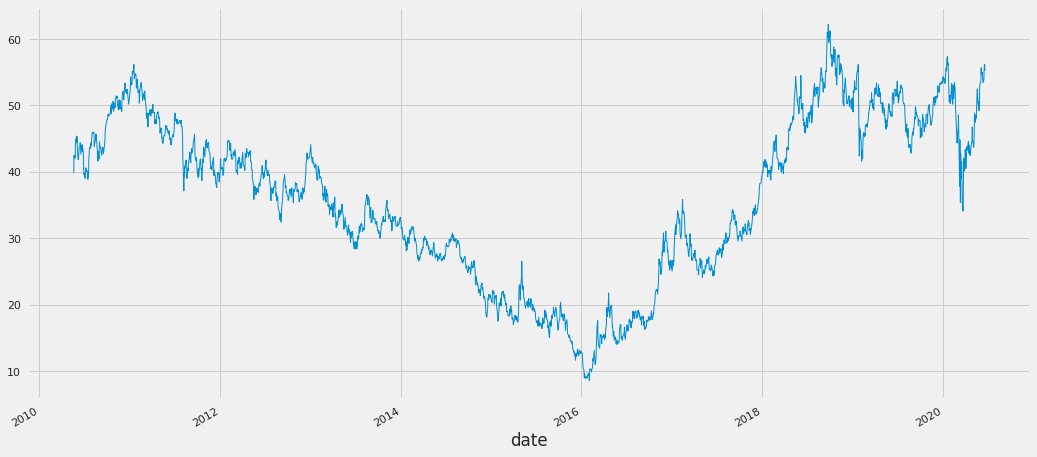

In [181]:
df_vale3['price'].plot(linewidth=1)
plt.grid(True)

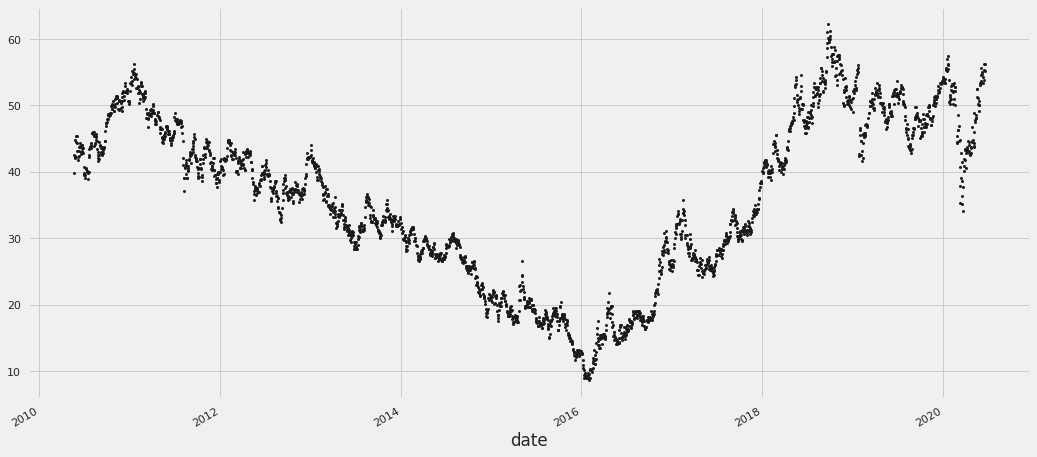

In [182]:
df_vale3['price'].plot(style='k.')
plt.grid(True)

In [183]:
df_vale3.head()

,price,open,high,low,volume,year,month,day
date,,,,,,,,
2020-06-19,55.170000,56.330000,56.600000,54.710000,37.860000,2020,6,19
2020-06-18,56.170000,56.300000,56.540000,55.610000,25.690000,2020,6,18
2020-06-17,56.200000,55.490000,56.440000,55.150000,27.570000,2020,6,17
2020-06-16,55.390000,55.490000,55.500000,54.220000,29.170000,2020,6,16
2020-06-15,53.880000,52.500000,54.430000,52.130000,27.320000,2020,6,15


---

## Metric to Evaluation

In [184]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

---

## Save Results

In [185]:
dict_results = {}

## Show Results

In [186]:
def show_result_model(df_train, df_test, y_forecast, model_name):   
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['prediction'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)
    dict_results[model_name] = mape
    
    # plot
    pd.concat([df_train, df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Time (Days)")
    plt.ylabel("Price (R$)")
    plt.title(f'MAPE = {mape} %')

---

## Train and Test

In [187]:
size_train = int(len(df_vale3)*0.8)
size_test = int(len(df_vale3)*0.2)
print(size_train)
print(size_test)

df_train = df_vale3.iloc[size_test:]
df_test = df_vale3.iloc[:size_test]

1996
499


In [188]:
df_vale3_without_target = df_train.columns
df_vale3_without_target = df_vale3_without_target.drop('price')

print(df_vale3_without_target)

Index(['open', 'high', 'low', 'volume', 'year', 'month', 'day'], dtype='object')


Text(0.5, 1.0, 'Train size: 1996')

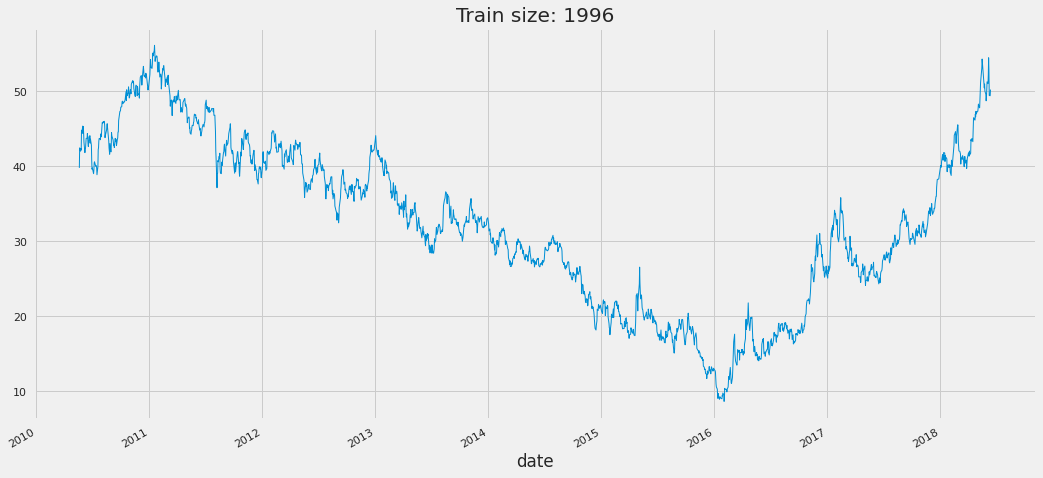

In [189]:
df_train['price'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 499')

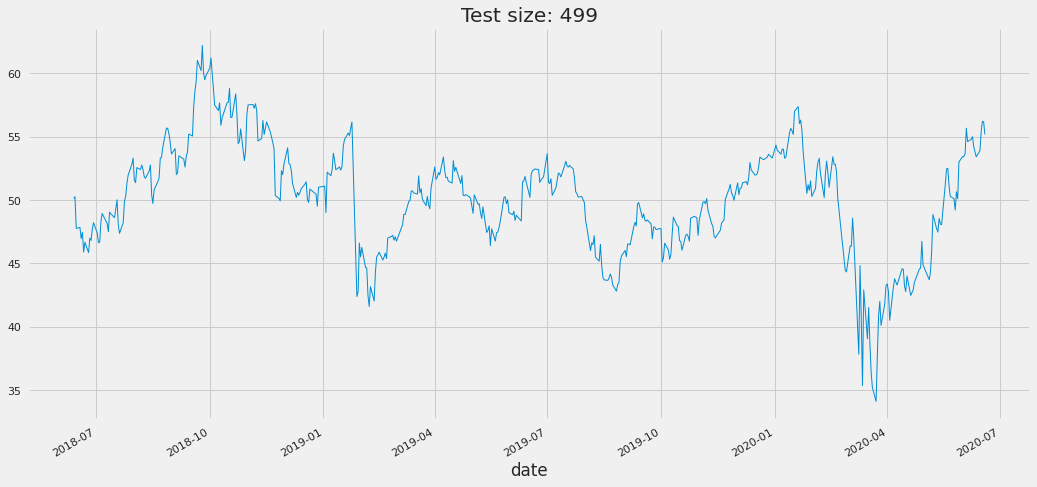

In [190]:
df_test['price'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [191]:
df_train.index

DatetimeIndex(['2018-06-12', '2018-06-11', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-01',
               '2018-05-30', '2018-05-29',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=1996, freq=None)

In [192]:
df_test.index

DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-13'],
              dtype='datetime64[ns]', name='date', length=499, freq=None)

In [193]:
X_train = df_train[df_vale3_without_target]
y_train = df_train['price']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])

1996
1996
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
                open      high       low    volume  year  month  day
date                                                                
2018-06-12 49.090000 50.890000 48.750000 18.370000  2018      6   12
2018-06-11 49.930000 50.540000 49.170000 14.340000  2018      6   11
2018-06-08 52.480000 52.480000 49.240000 30.340000  2018      6    8
2018-06-07 54.880000 55.160000 51.580000 32.360000  2018      6    7
2018-06-06 52.970000 54.650000 52.960000 26.720000  2018      6    6
date
2018-06-12   50.250000
2018-06-11   49.430000
2018-06-08   49.460000
2018-06-07   52.850000
2018-06-06   54.500000
Name: price, dtype: float64


In [194]:
X_test = df_test[df_vale3_without_target]
y_test = df_test['price']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

499
499
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
                open      high       low    volume  year  month  day
date                                                                
2020-06-19 56.330000 56.600000 54.710000 37.860000  2020      6   19
2020-06-18 56.300000 56.540000 55.610000 25.690000  2020      6   18
2020-06-17 55.490000 56.440000 55.150000 27.570000  2020      6   17
2020-06-16 55.490000 55.500000 54.220000 29.170000  2020      6   16
2020-06-15 52.500000 54.430000 52.130000 27.320000  2020      6   15
date
2020-06-19   55.170000
2020-06-18   56.170000
2020-06-17   56.200000
2020-06-16   55.390000
2020-06-15   53.880000
Name: price, dtype: float64


---

## Linear models

#### Bayesian regression

In [195]:
model_bayes_r = linear_model.BayesianRidge()
model_bayes_r.fit(X_train, y_train)

BayesianRidge()

In [196]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([55.22280028, 55.95600823, 56.00936071, 54.47000543, 53.77341755])

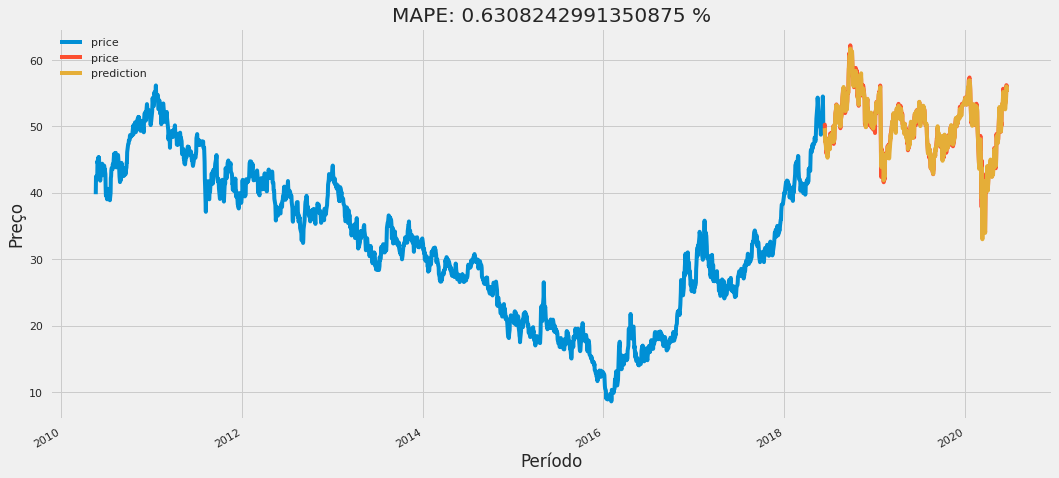

In [197]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred,
                  model_name='model_bayes_r')

#### Lasso

In [198]:
model_lasso = linear_model.Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [199]:
y_pred_lasso = model_lasso.predict(X_test)
y_pred_lasso[:5]

array([55.68657286, 55.85347157, 55.66948426, 54.74028073, 53.43937873])

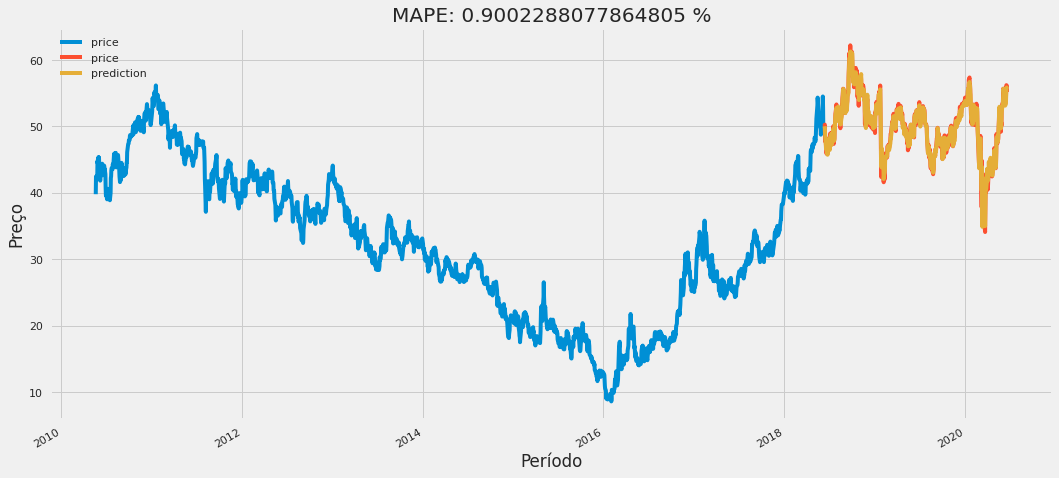

In [200]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_lasso,
                  model_name='model_lasso')

---

## Tree models

#### Random forest

In [201]:
# RandomForest params dict
rf_params_one = {}

rf_params_one['n_estimators'] = 1000
rf_params_one['max_depth'] = 10
rf_params_one['min_samples_split'] = 10
rf_params_one['min_samples_leaf'] = 10 # end tree necessary 30 leaf
rf_params_one['n_jobs'] = -1 # run all process

In [202]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=1000, n_jobs=-1)

In [203]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=1000, n_jobs=-1)

In [204]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor[:5]

array([54.38423226, 54.38423226, 54.38423226, 54.38423226, 53.00724386])

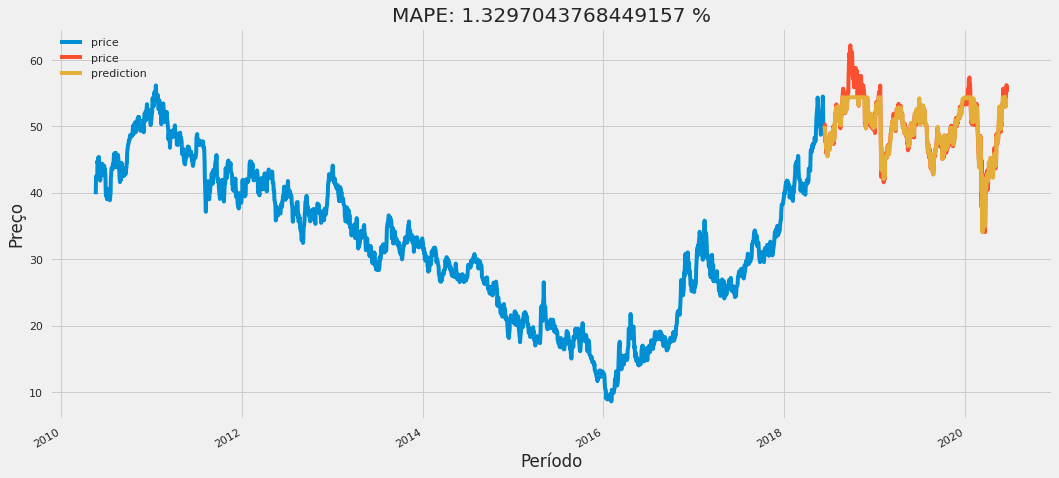

In [205]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

#### XGBoost

In [206]:
model_xgb = xgb.XGBRegressor()
model_xgb

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [207]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb[:5]

array([55.594597, 55.62714 , 55.988422, 54.902905, 52.7321  ],
      dtype=float32)

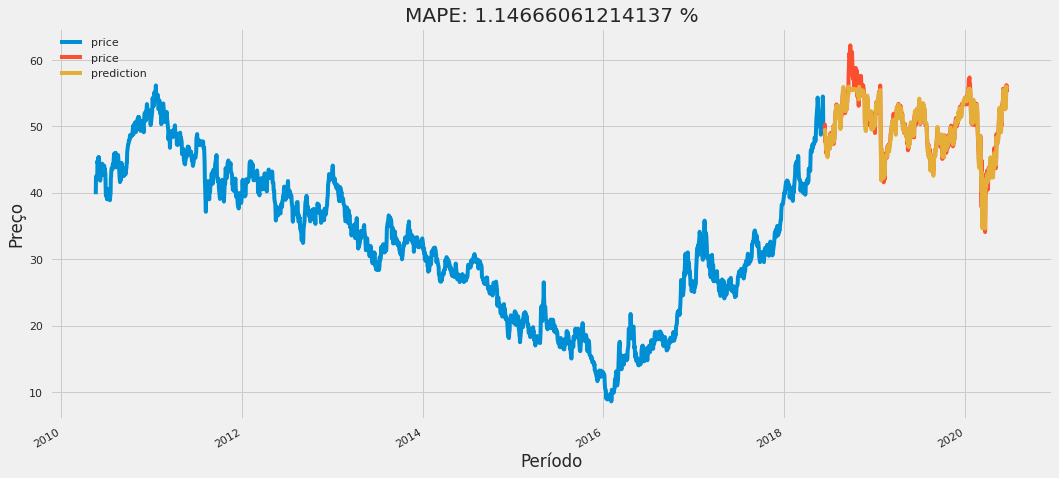

In [209]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_xgb,
                  model_name='model_xgb')

---

### SVM

#### Test 01

In [210]:
model_svm_regressor_01 = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=.1)
model_svm_regressor_01

SVR(C=1000.0, gamma=0.1)

In [211]:
model_svm_regressor_01.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [212]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([32.46742889, 32.73078638, 32.54592097, 32.48420847, 32.75555413])

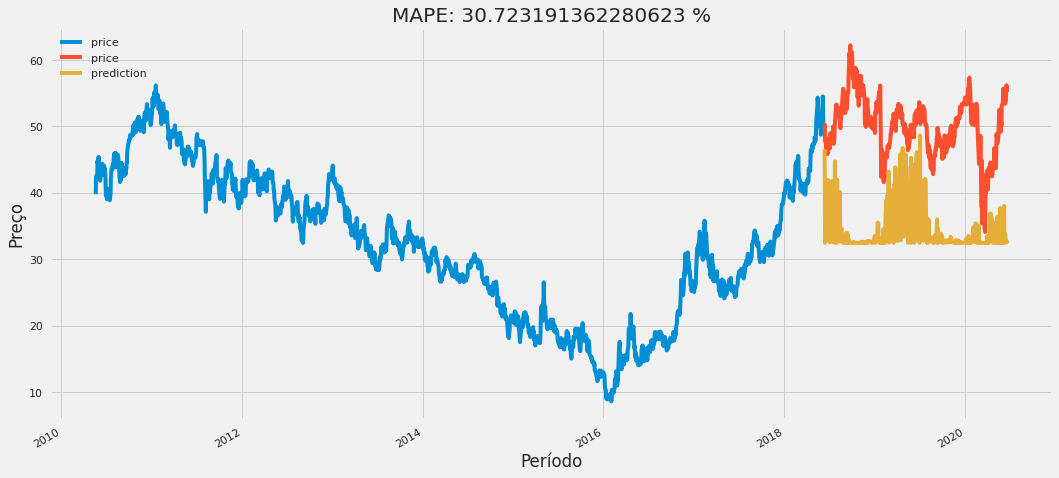

In [213]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor_01')

#### Test 02

In [214]:
model_svm_regressor_02 = SVR(kernel='rbf', C=1e3, gamma=0.001)
model_svm_regressor_02

SVR(C=1000.0, gamma=0.001)

In [215]:
model_svm_regressor_02.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.001)

In [216]:
y_pred_svm_regressor_02 = model_svm_regressor_02.predict(X_test)
y_pred_svm_regressor_02[:5]

array([53.74820073, 55.57438751, 55.4016473 , 53.83653185, 53.04619543])

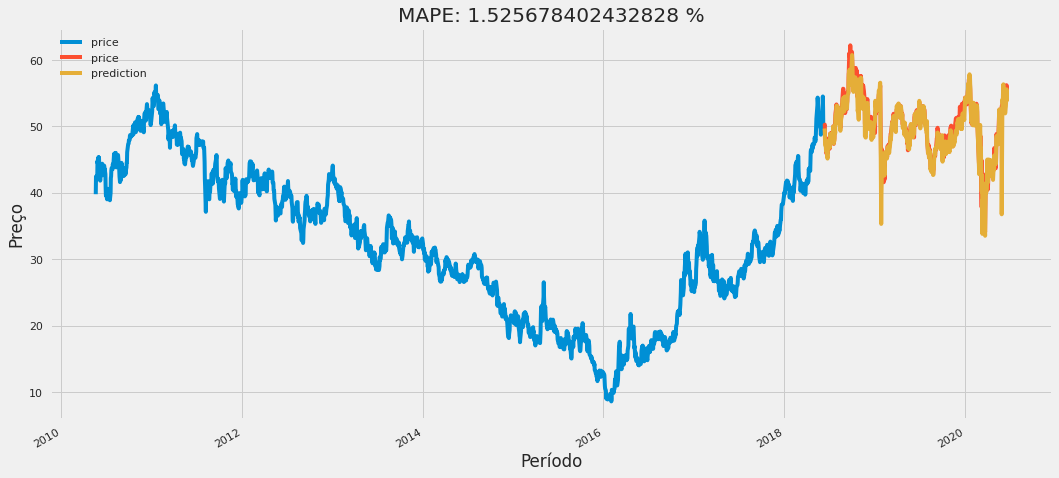

In [217]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor_02,
                  model_name='model_svm_regressor_02')

---

## Results

In [218]:
dict_results

{'model_bayes_r': 0.6308242991350875,
 'model_lasso': 0.9002288077864805,
 'model_rf_regressor': 1.3297043768449157,
 'model_xgb': 1.14666061214137,
 'model_svm_regressor_01': 30.723191362280623,
 'model_svm_regressor_02': 1.525678402432828}

---